# Setup Enviroment & Use Activate it
### Bash -> source ./venv/bin/activate
### Windows -> .\venv\Scripts\activate

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import path as path
import os
import statsmodels.api as sm

In [2]:
path = os.getcwd()

In [3]:
df = pd.read_csv(path + '\\HRS_data.csv')

In [4]:
df.head()

,rassrecv,h14itot,r13jhours,r14isret,racohbyr,r14ipena,r14jnjob,r14hlthlm,r14peninc,r14peni_n,...,inw8,inw9,inw10,inw11,inw12,inw13,inw14,retire,r14agey_b,ragender
0,1,664920.0,15,42000.0,2,16560.0,6,1,1,1,...,0,0,0,0,0,0,1,0,90,1
1,1,75300.0,6,25200.0,3,0.0,2,1,0,0,...,0,0,0,0,0,0,1,1,77,1
2,1,9000.0,0,9000.0,3,0.0,4,0,0,0,...,0,0,0,0,0,0,1,1,85,1
3,1,20520.0,0,3720.0,3,0.0,4,1,0,0,...,0,0,0,0,0,0,1,1,77,2
4,1,115000.0,30,32400.0,3,0.0,3,1,0,0,...,0,0,0,0,0,0,1,0,78,2


In [5]:
df.describe()

,rassrecv,h14itot,r13jhours,r14isret,racohbyr,r14ipena,r14jnjob,r14hlthlm,r14peninc,r14peni_n,...,inw8,inw9,inw10,inw11,inw12,inw13,inw14,retire,r14agey_b,ragender
count,12190.000000,1.219000e+04,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,...,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000
mean,0.782691,7.590757e+04,26.318130,7217.978494,4.124036,5122.910703,2.849385,0.267432,0.282937,0.331665,...,0.068499,0.064561,0.065463,0.063002,0.079081,0.073339,0.297949,0.533224,65.584906,1.543396
std,0.412432,1.265823e+05,20.067223,7952.711238,1.372481,17536.406803,1.699355,0.442638,0.450444,0.576858,...,0.252610,0.245760,0.247352,0.242977,0.269877,0.260703,0.457376,0.498915,6.422076,0.498134
min,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000
25%,1.000000,2.264800e+04,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,1.000000
50%,1.000000,4.480000e+04,32.000000,6000.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,64.000000,2.000000
75%,1.000000,8.558400e+04,40.000000,12600.000000,5.000000,2100.000000,4.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,68.000000,2.000000
max,1.000000,3.316800e+06,168.000000,228000.000000,7.000000,647400.000000,12.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,2.000000


In [7]:
###select variables 
df2=df.loc[ :,['rassrecv', 'h14itot'] ]
df2.nunique()

rassrecv       2
h14itot     8492
dtype: int64

In [8]:
df3=df.loc[ :,['r14agey_b','ragender','r14mstath','rassrecv', 'h14itot'] ]

In [9]:
df2 = df2.dropna()
df3 = df3.dropna()

In [19]:
df2=df2.loc[(df2.h14itot>0) & (df2.h14itot<250000),:]

In [20]:
df2['income_group'] = pd.cut(df2['h14itot'], bins=range(0, int(df2['h14itot'].max()) + 10000, 10000))
counts = df2.groupby('income_group')['rassrecv'].sum()

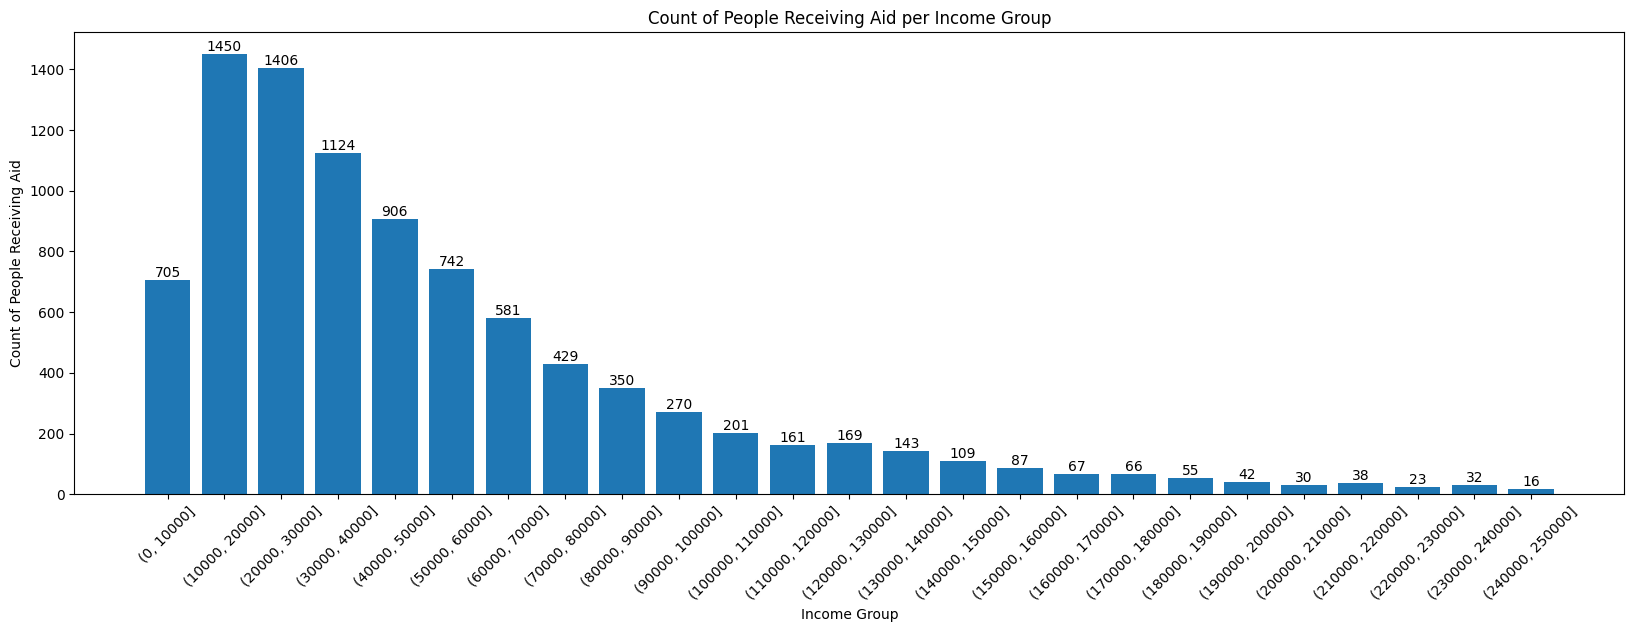

In [29]:
plt.figure(figsize=(20, 6))  

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Income Group')
plt.ylabel('Count of People Receiving Aid')
plt.title('Count of People Receiving Aid per Income Group')
plt.xticks(rotation=45)

# Add count numbers on top of each bar
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [30]:
df2.describe()

,rassrecv,h14itot
count,11494.000000,11494.000000
mean,0.800592,58517.705690
std,0.399573,49204.274703
min,0.000000,0.120000
25%,1.000000,22689.500000
50%,1.000000,43200.000000
75%,1.000000,79424.000000
max,1.000000,249811.789600


In [47]:
X = df2['h14itot'].values.reshape(-1,1)
y = df2['rassrecv'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [46]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [0.90796013]
Coefficient: [[-1.83480399e-06]]


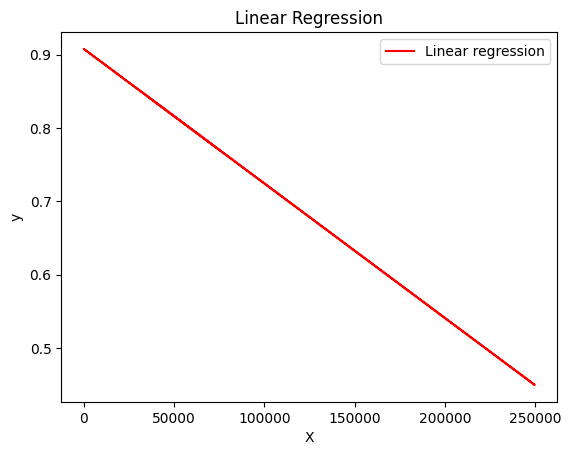

In [57]:
# Generate the predicted values
y_pred = model.predict(X)

# Plot the scatter plot and the linear regression line
# plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, label='Linear regression', color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [60]:
# standard error and calculate t-statistics
X2 = sm.add_constant(X)

##linear regression
ols = sm.OLS(y,X2)

ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     618.2
Date:                Sat, 20 May 2023   Prob (F-statistic):          5.73e-133
Time:                        21:48:12   Log-Likelihood:                -5463.5
No. Observations:               11494   AIC:                         1.093e+04
Df Residuals:                   11492   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9080      0.006    160.935      0.000       0.897       0.919
x1         -1.835e-06   7.38e-08    -24.864      0.000   -1.98e-06   -1.69e-06
==============================================================================
Omnibus:                     2247.670   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3853.047
Skew:                          -1.408   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
###Heteroskedastic robust standard error

ols = sm.OLS(y,X2)
ols_result = ols.fit(cov_type='HC1')
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     463.6
Date:                Sat, 20 May 2023   Prob (F-statistic):          7.60e-101
Time:                        21:47:43   Log-Likelihood:                -5463.5
No. Observations:               11494   AIC:                         1.093e+04
Df Residuals:                   11492   BIC:                         1.095e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9080      0.005    169.511      0.000       0.897       0.918
x1         -1.835e-06   8.52e-08    -21.532      0.000      -2e-06   -1.67e-06
==============================================================================
Omnibus:                     2247.670   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3853.047
Skew:                          -1.408   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""